- Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [61]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [62]:
# load dataset
data = pd.read_csv("wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


# EDA

In [63]:
data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [64]:
# # As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [65]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [66]:
# no null value and datatype also assign accuratly

In [67]:
# print the duplicated rows
data.duplicated().sum()

0

In [68]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


- Looking for some statistical information about each feature, we can see that the features have very diferrent scales

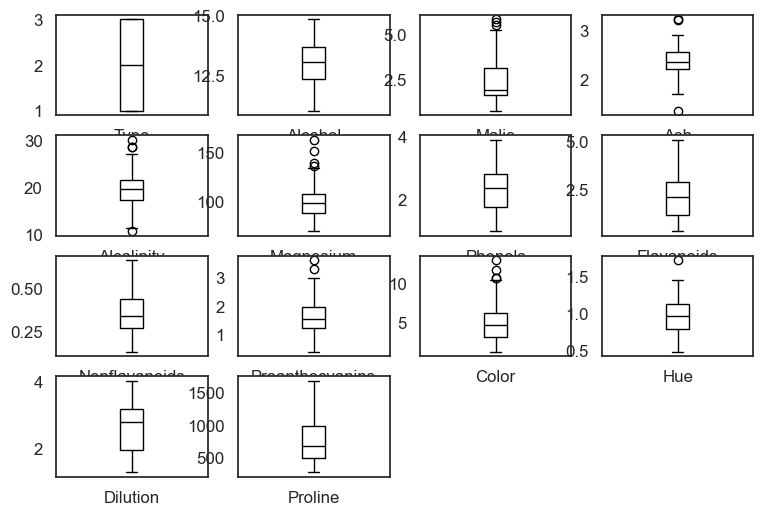

In [69]:
# outliers Treatment
data.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show();

In [70]:
data.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

- Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as:
     - Check the kind of each feature distribution
     - Check data symmetry
     - Verify features frequency
     - Identify outliers

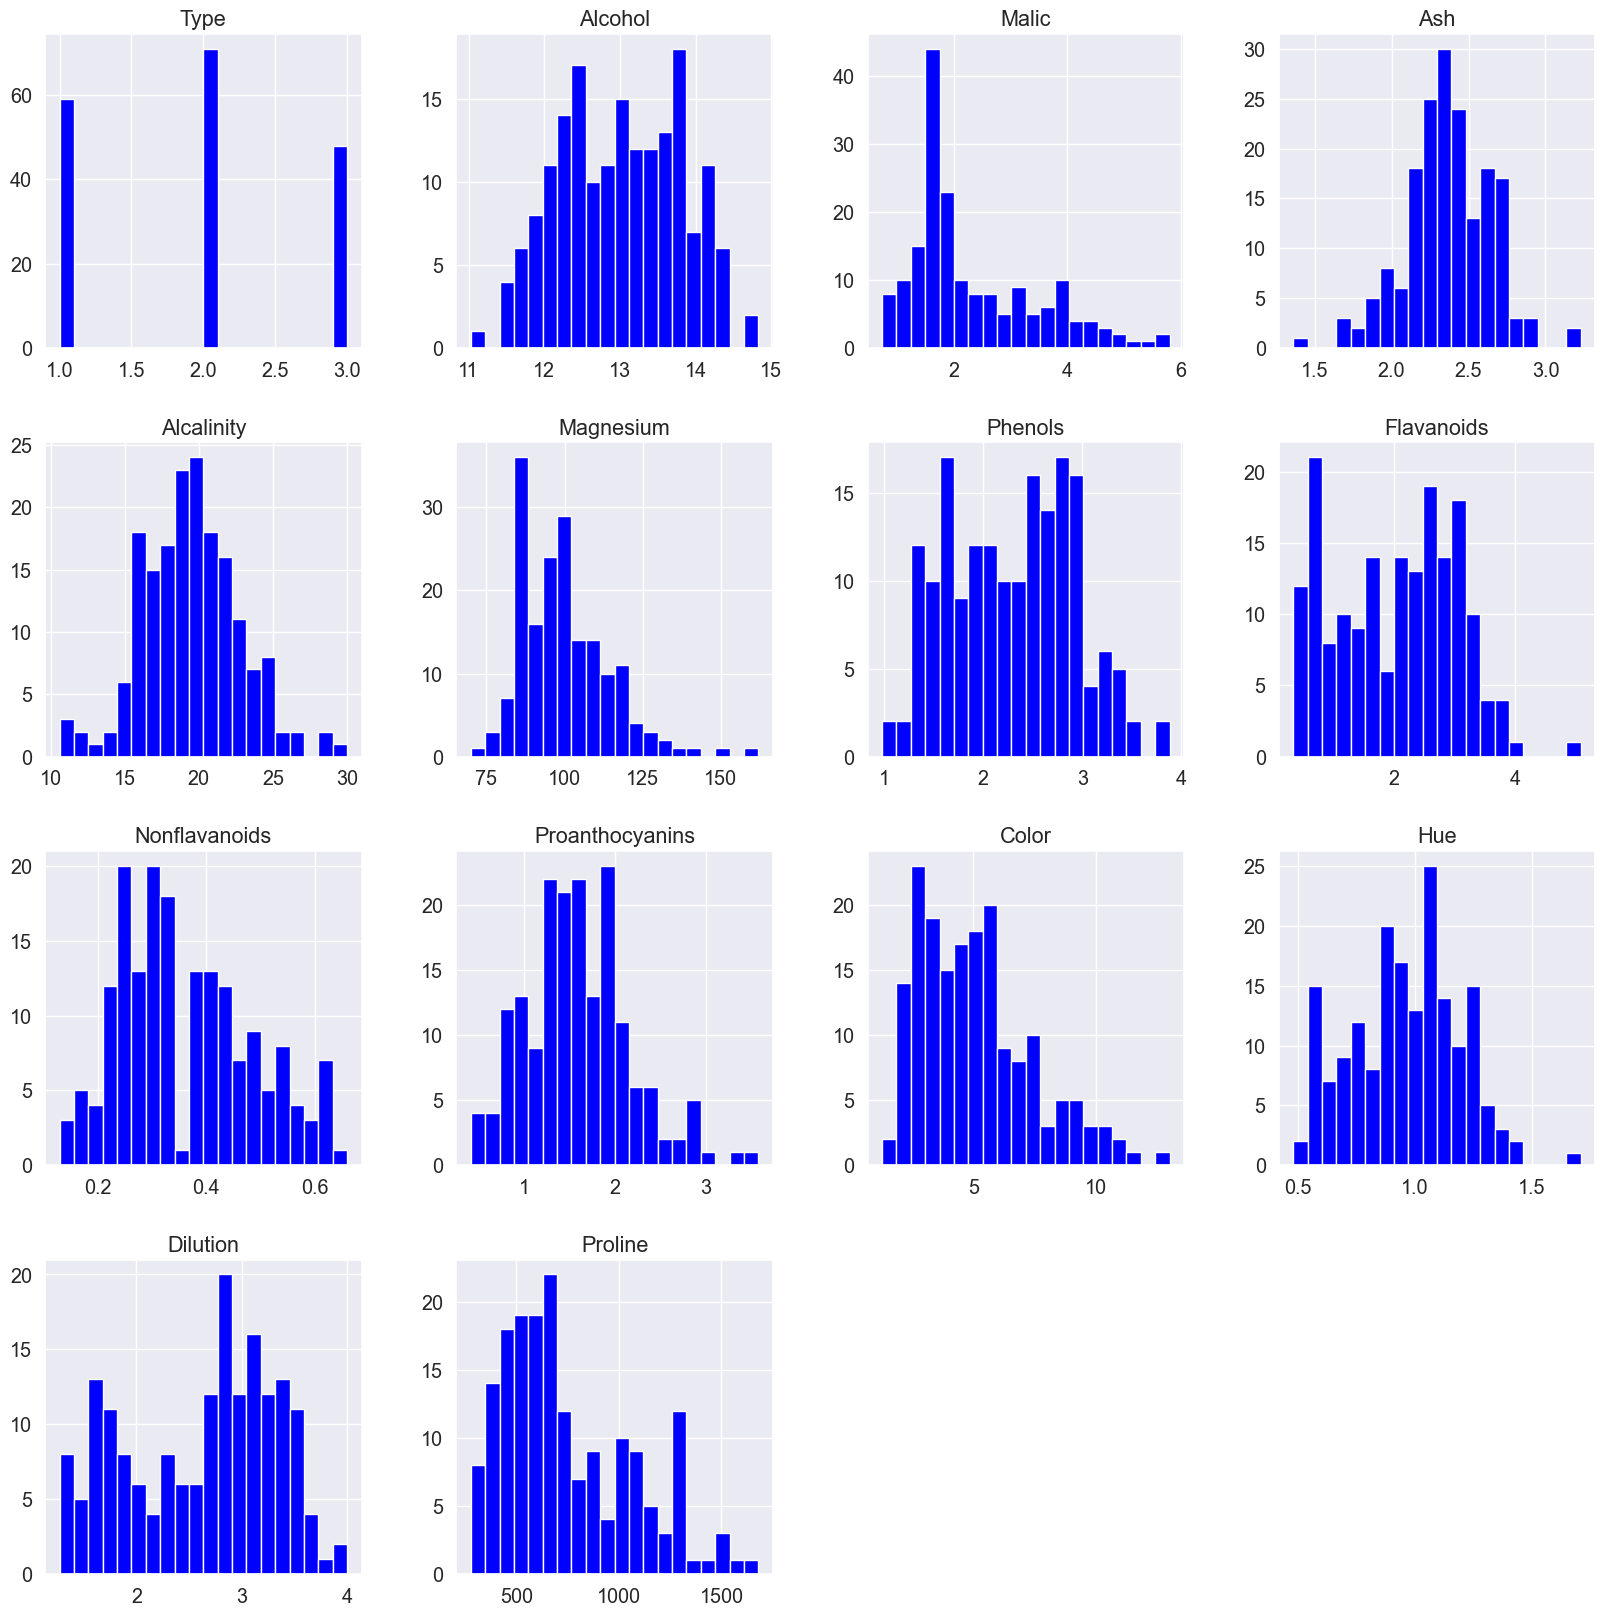

In [71]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='blue' )

In [72]:
# Malic and Magneshium feature skew value is high

In [73]:
data.Malic=np.sqrt(data.Malic)

In [74]:
data.Magnesium=np.sqrt(data.Magnesium)

In [75]:
data.skew()

Type               0.107431
Alcohol           -0.051482
Malic              0.674257
Ash               -0.176699
Alcalinity         0.213047
Magnesium          0.838231
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

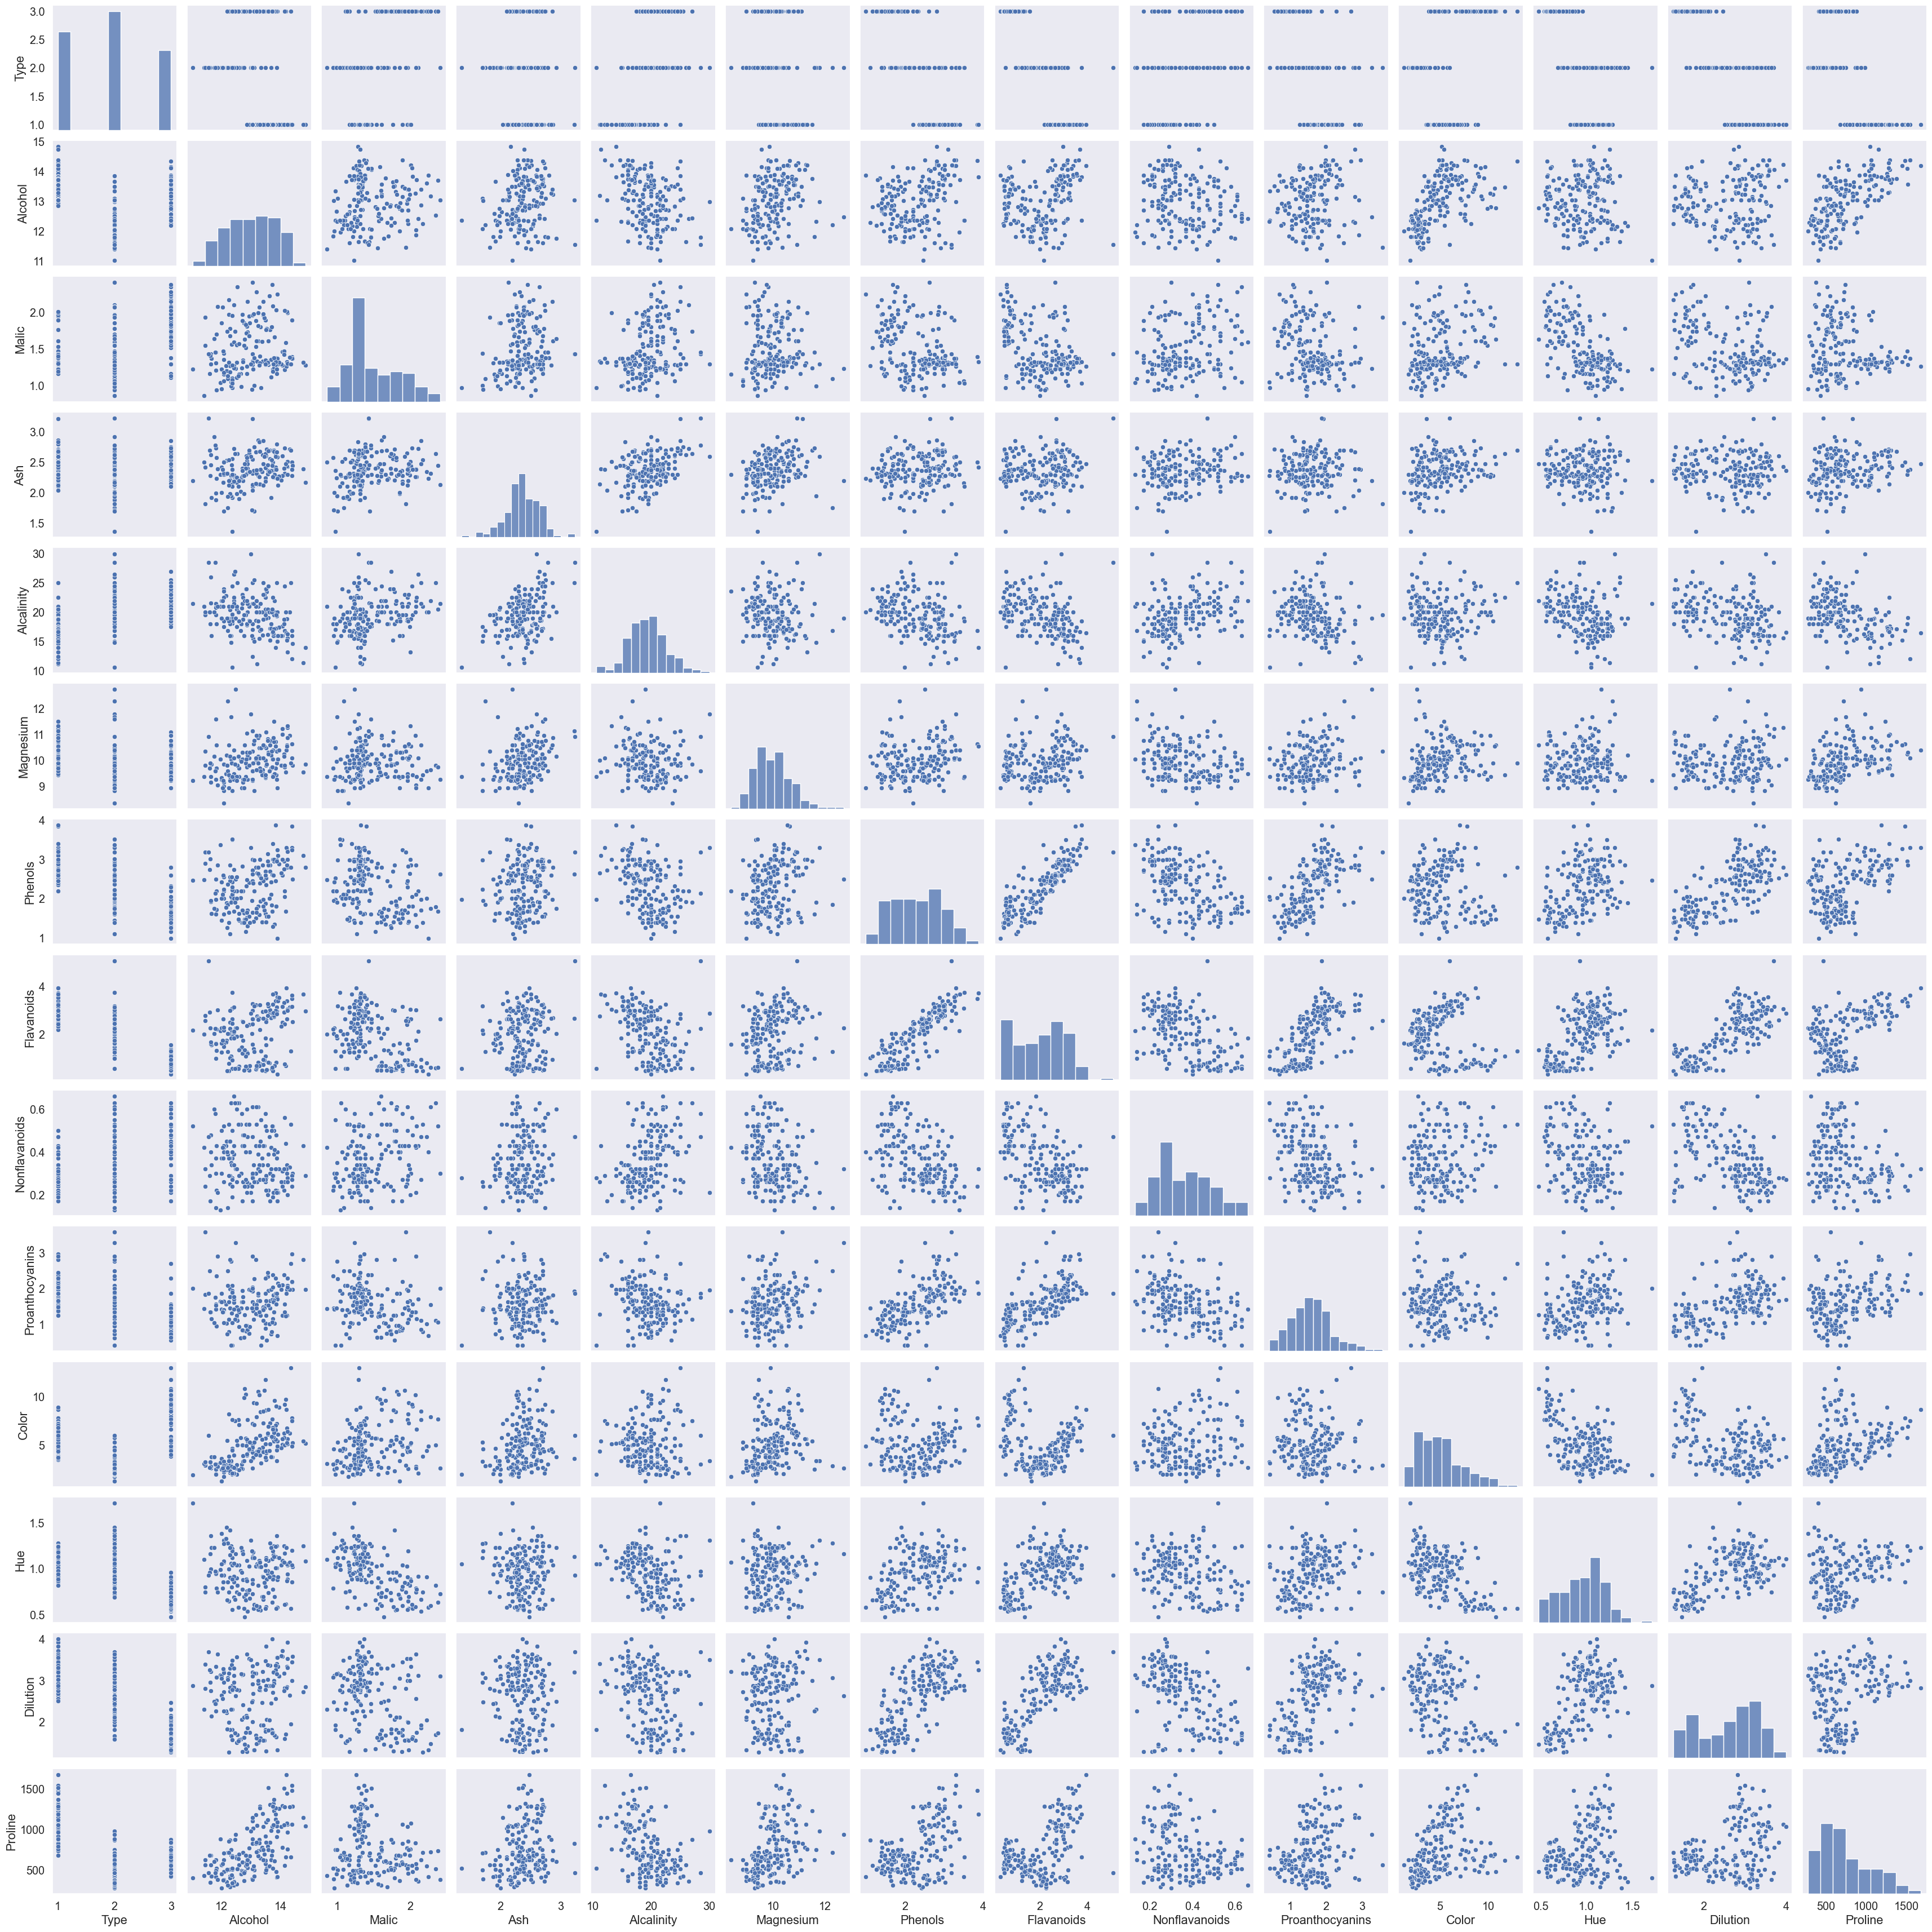

In [76]:
# Data Visualization
sns.pairplot(data,palette="dark")
plt.show();

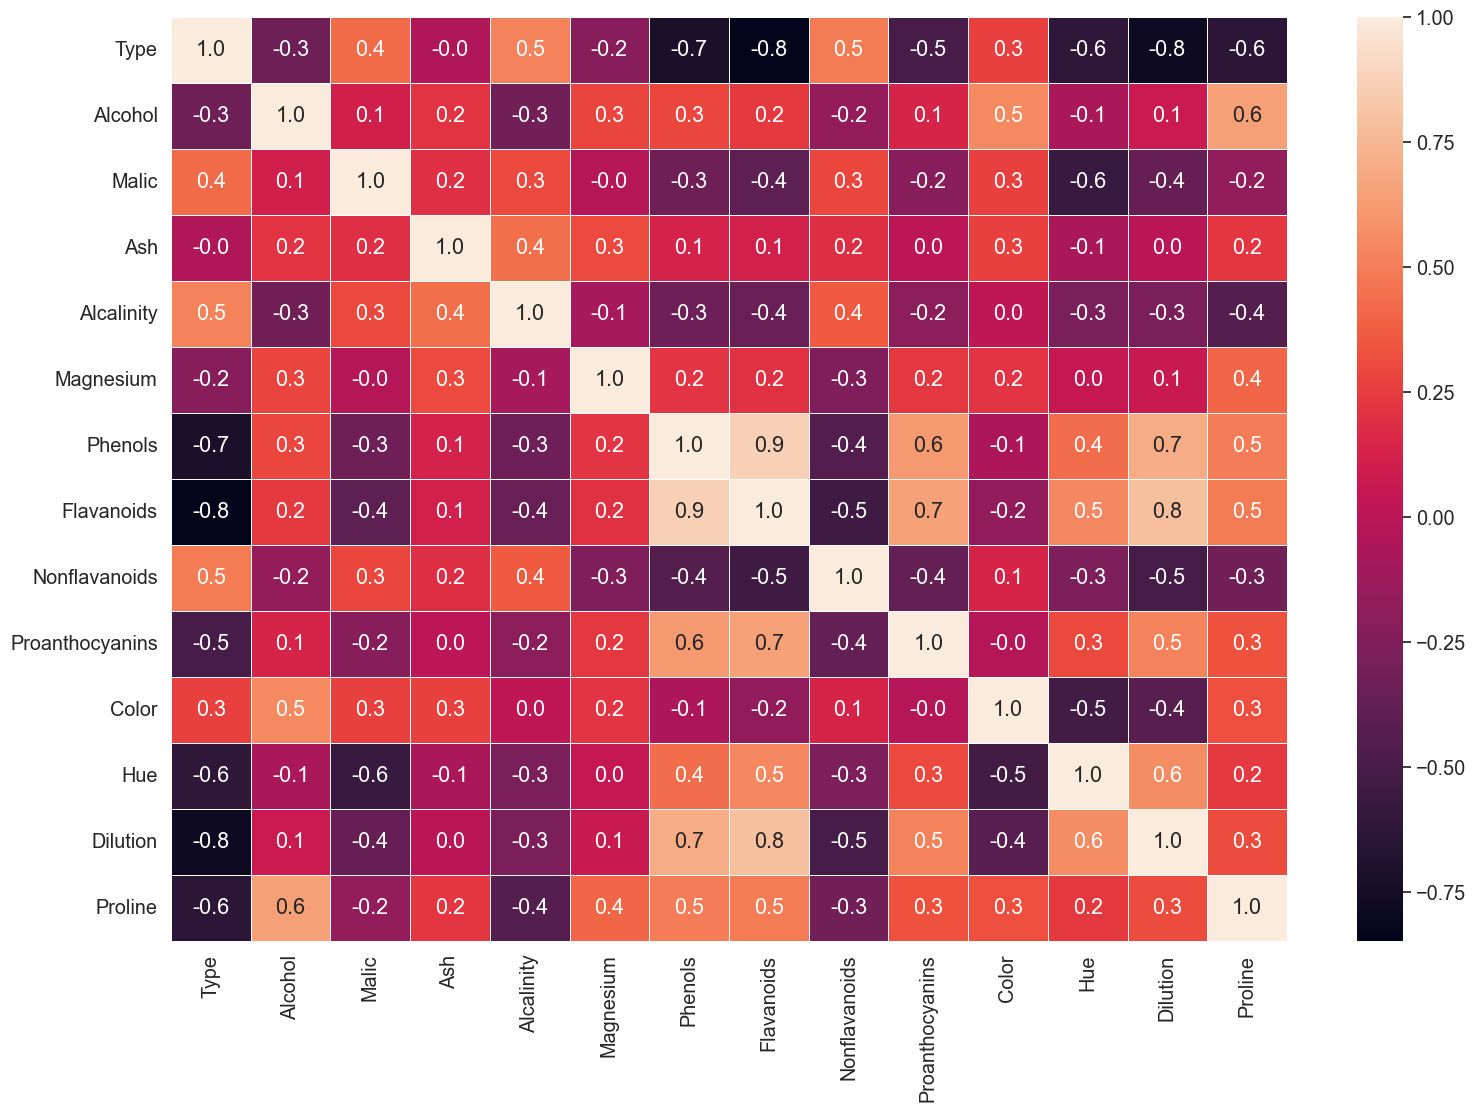

In [77]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show();

- Unique points in this correlation matrix:

    - Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins
    - Flavanoids is positively correlated with Proanthocyanins and Dilution
    - Dilution is positively correlated with Hue
    - Alcohol is positively correlated with Proline

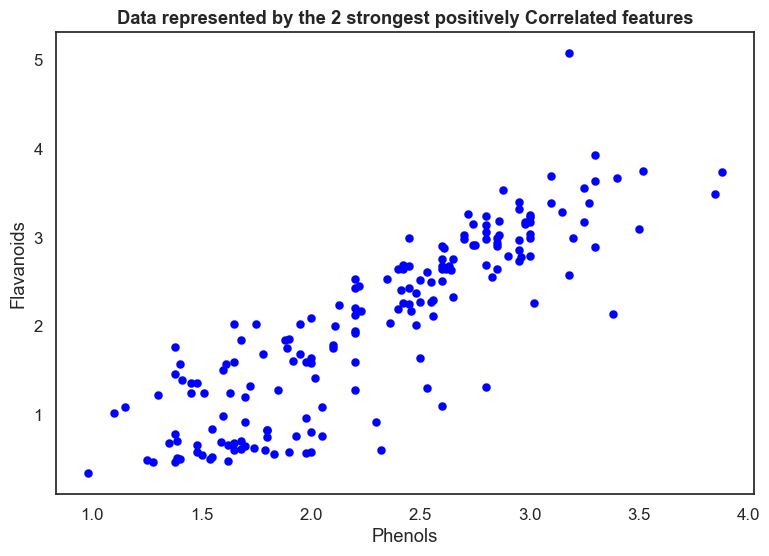

In [78]:
# Plotting frequent flying Phenols vs. Flavanoids  
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=data['Phenols'], y=data['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',fontweight='bold')
plt.show();

In [79]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.307670,2.43,15.6,11.269428,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.334166,2.14,11.2,10.000000,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,1.536229,2.67,18.6,10.049876,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.396424,2.50,16.8,10.630146,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,1.609348,2.87,21.0,10.862780,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.326650,2.45,15.2,10.583005,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.367479,2.45,14.6,9.797959,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,1.466288,2.61,17.6,11.000000,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.280625,2.17,14.0,9.848858,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.161895,2.27,16.0,9.899495,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


# PCA
Using Principal Component Analysis or PCA in short to reduce the dimensionality of the data in order to optimize the result 
of the clustering.

In [80]:
# importing libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [81]:
# separating target column
Type=data.Type
Type

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     2
60     2
61     2
62     2
63     2
64     2
65     2
66     2
67     2
68     2
69     2
70     2
71     2
72     2
73     2
74     2
75     2
76     2
77     2
78     2
79     2
80     2
81     2
82     2
83     2
84     2
85     2
86     2
87     2
88     2
89     2
90     2
91     2
92     2
93     2
94     2
95     2
96     2
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
110    2
1

- Dropping Type Feature as it is a classifier that we have three types of wines which we need to find in clustering by keeping it will affect our inferences and further analysis

In [82]:
# now lets work on features
data1=data.iloc[:,1:]
data1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.307670,2.43,15.6,11.269428,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,13.20,1.334166,2.14,11.2,10.000000,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,13.16,1.536229,2.67,18.6,10.049876,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,14.37,1.396424,2.50,16.8,10.630146,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,13.24,1.609348,2.87,21.0,10.862780,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,14.20,1.326650,2.45,15.2,10.583005,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,14.39,1.367479,2.45,14.6,9.797959,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,14.06,1.466288,2.61,17.6,11.000000,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,14.83,1.280625,2.17,14.0,9.848858,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,13.86,1.161895,2.27,16.0,9.899495,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [83]:
# Normalizing the numerical data 
data1 = scale(data1)
data1

array([[ 1.51861254, -0.52594693,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.44912913, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.13667975,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.68072569, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.3486609 ,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.55324915,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [84]:
# calling pca function and train model
pca = PCA()
pca_values = pca.fit_transform(data1)

In [85]:
pca.components_            # all 13 Pc's components

array([[ 1.44157060e-01, -2.40301009e-01, -3.54989485e-03,
        -2.40438498e-01,  1.41301889e-01,  3.95600000e-01,
         4.23351445e-01, -2.99131815e-01,  3.13659751e-01,
        -8.96147057e-02,  2.97357831e-01,  3.76409833e-01,
         2.86286124e-01],
       [-4.77707360e-01, -2.44787333e-01, -3.18678052e-01,
         7.70676384e-03, -3.12448966e-01, -6.60360129e-02,
         3.73504584e-04, -2.71559645e-02, -3.97123168e-02,
        -5.22826569e-01,  2.76080908e-01,  1.59153887e-01,
        -3.62024490e-01],
       [-2.12616398e-01,  1.07761364e-01,  6.20183016e-01,
         6.09284056e-01,  1.21129139e-01,  1.48012459e-01,
         1.54339357e-01,  1.66710088e-01,  1.50709351e-01,
        -1.46520449e-01,  8.72733107e-02,  1.73532509e-01,
        -1.31237047e-01],
       [-3.36703498e-02,  5.15559189e-01, -2.33889338e-01,
         6.01435239e-02, -3.26021183e-01,  1.79411975e-01,
         1.43080485e-01, -2.30713261e-01,  4.09414564e-01,
         7.13678495e-02, -4.46832388e

In [86]:
pca_values    # pc's scores

array([[ 3.30216995e+00, -1.45614458e+00, -1.83568517e-01, ...,
        -4.72735485e-01,  5.71438361e-01, -6.57899309e-02],
       [ 2.20547524e+00,  3.20136706e-01, -2.00199994e+00, ...,
        -1.44899140e-01,  3.92674805e-01, -1.01470347e-04],
       [ 2.49439987e+00, -1.07885502e+00,  1.00058026e+00, ...,
        -2.93282795e-01, -1.61190913e-03,  2.35287847e-02],
       ...,
       [-2.65937430e+00, -2.76172256e+00, -9.73572631e-01, ...,
         5.24689458e-01,  6.72186330e-01,  5.25670502e-02],
       [-2.42092086e+00, -2.31728564e+00, -5.91939953e-01, ...,
         2.95957405e-01,  3.69847602e-01, -1.79334796e-02],
       [-3.19889700e+00, -2.76650159e+00,  9.86690233e-01, ...,
        -2.24916486e-01, -1.97284526e-01, -3.24504347e-01]])

In [87]:
# Creating a dataframe featuring the all Principal components that we acquired through PCA.
PCA_dataset = pd.DataFrame(data = pca_values, columns = ['component1', 'component2', 'component3', 'component4', 
                                                                  'component5', 'component6','component7', 'component8', 'component9',
                                                                 'component10', 'component11', 'component12', 'component13'] )
PCA_dataset.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13
0,3.302170,-1.456145,-0.183569,-0.169738,0.643306,-0.207284,0.596426,0.047367,0.644993,-0.987731,-0.472735,0.571438,-0.065790
1,2.205475,0.320137,-2.002000,-0.274710,-0.187697,-0.994995,0.111291,1.008794,-0.335200,-0.128261,-0.144899,0.392675,-0.000101
2,2.494400,-1.078855,1.000580,0.738799,-0.282777,0.494126,0.482989,-0.382475,-1.154368,-0.070571,-0.293283,-0.001612,0.023529
3,3.741707,-2.777723,-0.187586,0.560700,-0.340861,0.098449,-0.381100,0.647252,0.018697,-0.277866,0.744082,-0.243782,-0.366587
4,0.980570,-0.938010,2.030383,-0.399034,0.328854,-0.408784,0.472312,0.408962,0.335962,0.108470,-0.512980,-0.210010,-0.078845


In [88]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36122562, 0.19502299, 0.11149233, 0.07004049, 0.06448017,
       0.04959148, 0.04174194, 0.0269469 , 0.02219485, 0.01881893,
       0.01734139, 0.0131273 , 0.0079756 ])

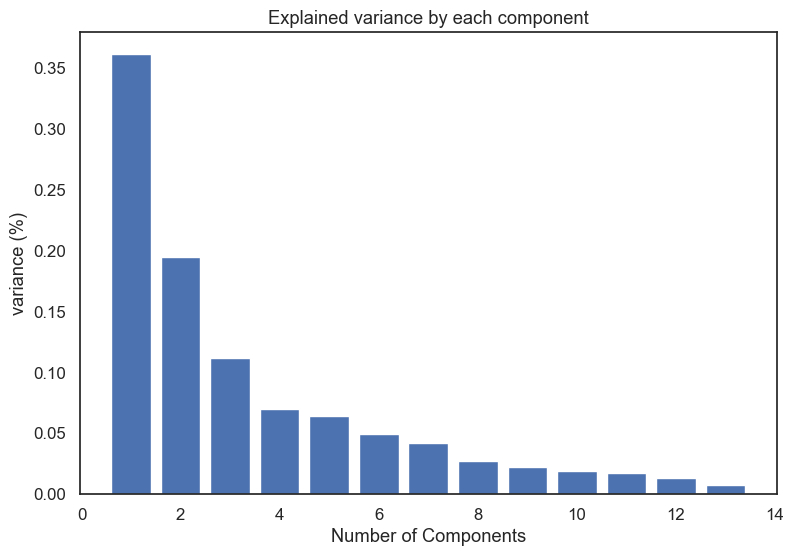

In [89]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')
plt.show();

In [90]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.12, 55.62, 66.77, 73.77, 80.22, 85.18, 89.35, 92.04, 94.26,
       96.14, 97.87, 99.18, 99.98])

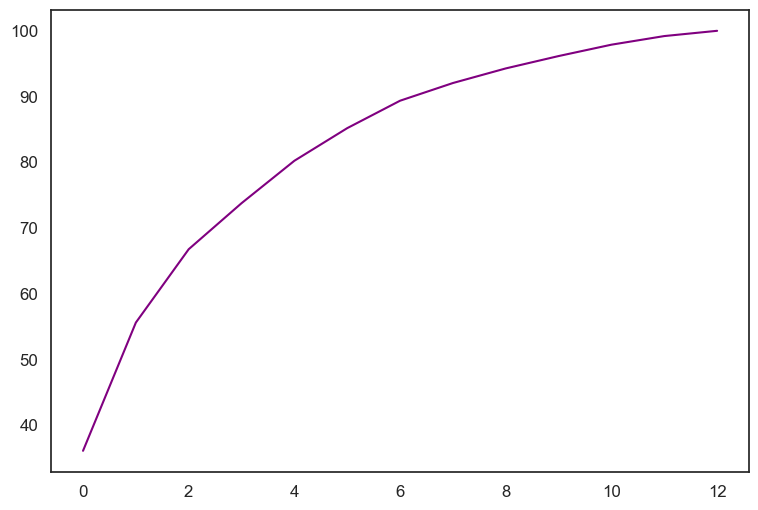

In [91]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="purple")

In [92]:
# As our problem is suggesting to use first 3 principal components for further computation, 
# so,Extracting the three features from PCA_dataset

In [93]:
principal_component1 = PCA_dataset['component1']
principal_component2 = PCA_dataset['component2']
principal_component3 = PCA_dataset['component3']

In [94]:
# Creating dataframe for further clusering algorithms
pca_df = pd.concat([principal_component1, principal_component2, principal_component3], axis = 1)
pca_df.head()

,component1,component2,component3
0,3.302170,-1.456145,-0.183569
1,2.205475,0.320137,-2.002000
2,2.494400,-1.078855,1.000580
3,3.741707,-2.777723,-0.187586
4,0.980570,-0.938010,2.030383


- The new columns are called Principal Components (PC's) and give the coordinates of the data in the new smaller space

C:\Users\PallaviJadhav\AppData\Local\Temp\ipykernel_8936\12660781.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(10,10)).gca(projection='3d')


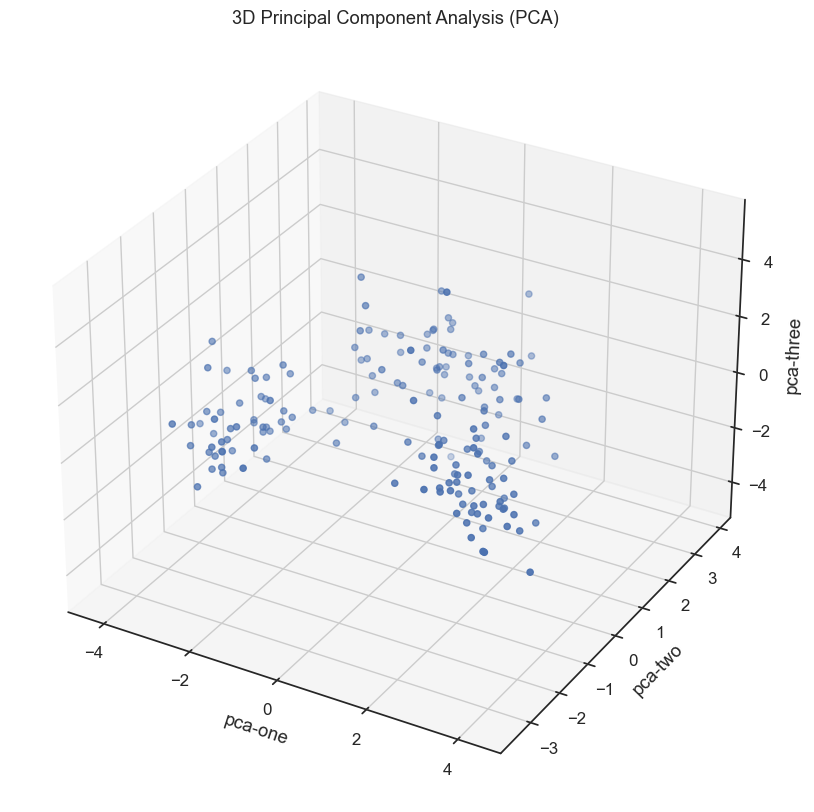

In [95]:
# Visualizing the results of the 3D PCA.
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component1, 
    ys=principal_component2, 
    zs=principal_component3,
   
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show();


# Hierarchical Agglomerative Clustering

In [96]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
H_clusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=3)

In [97]:
H_clu=H_clusters.fit_predict(pca_df)

In [98]:
Hie=pd.DataFrame(H_clu,columns=['clustersid_H'])
Hie

,clustersid_H
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [99]:
Hie['clustersid_H'].value_counts()

0    65
2    61
1    52
Name: clustersid_H, dtype: int64

In [100]:
#checking silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(pca_df,H_clu)

0.4527346523592565

# K-MEANS Clustering

In [101]:
from sklearn.cluster import KMeans

C:\Users\PallaviJadhav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


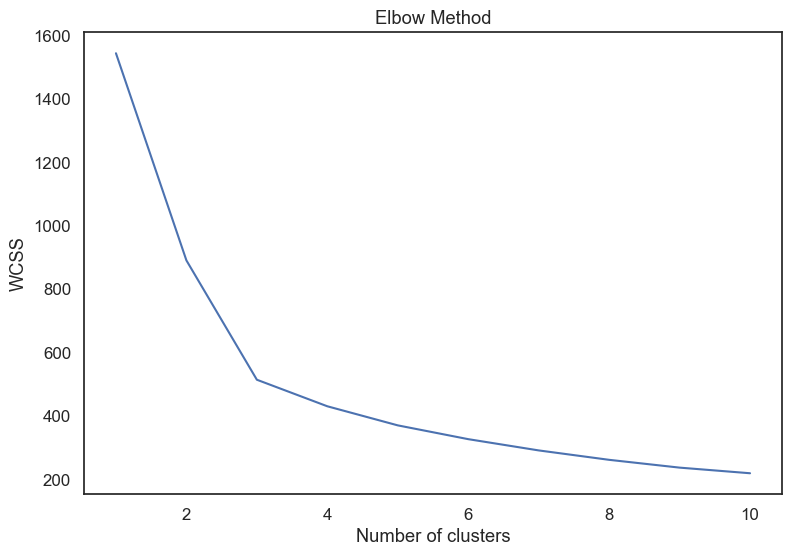

In [102]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [103]:
wcss

[1545.1525485615164,
 891.535504815158,
 514.946430785631,
 431.16844046834376,
 370.9344353247325,
 327.421374567111,
 291.8953935236317,
 262.1934566061438,
 237.57640067684378,
 219.83892197352893]

In [104]:
#Build Cluster algorithm

KM_clusters = KMeans(3, random_state=42)
K_mean=KM_clusters.fit_predict(pca_df)

In [105]:
kmean=pd.DataFrame(K_mean,columns=['clusterid_Kmeans'])
kmean

,clusterid_Kmeans
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [106]:
kmean['clusterid_Kmeans'].value_counts()


2    65
1    62
0    51
Name: clusterid_Kmeans, dtype: int64

In [107]:
#checking silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(pca_df,K_mean )

0.45565997441382444

# Preparing Actual Vs. Predicted Clusering Data

In [108]:
pd.set_option('display.max_rows',None)
pred_df = pd.concat([Type, Hie, kmean],axis = 1)
pred_df

,Type,clustersid_H,clusterid_Kmeans
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
5,1,0,1
6,1,0,1
7,1,0,1
8,1,0,1
9,1,0,1


In [109]:
# Almost 90% of all value for Type column is predicted accuretly by hierarchical and kmean cluster